In [8]:
import os

In [9]:
f_path = '/home/yuanfang/word2vec/品牌数据下载'

In [10]:
file_list = [name for name in os.listdir(f_path) if not name.startswith(('.'))]

In [11]:
len(file_list)

773

In [12]:
file_list[0]

'奥普.txt'

In [92]:
from collections import Counter

In [7]:
brand_count = Counter()
for fn in file_list:
    bn = fn.split('.')[0]
    with open(os.path.join(f_path, fn), 'r') as f:
        count = 0
        for count, line in enumerate(f):
            count += 1
    brand_count.update({bn: count})

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [10]:
brands = pd.DataFrame({'count': list(brand_count.values())}, index=list(brand_count.keys()))

In [11]:
brands = brands.sort_values(by='count', ascending=False)

In [12]:
brands

,count
华为,776363
突破,570865
腾讯,552594
英雄,522635
红旗_解放_一汽,509980
小米,509133
时尚,478582
京东,434857
长安,374524
美的,337945


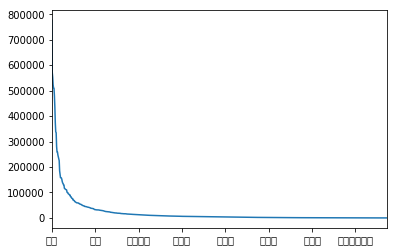

In [13]:
brands['count'].plot()

In [14]:
brands.describe()

,count
count,773.000000
mean,22062.919793
std,67292.342274
min,0.000000
25%,817.000000
50%,3784.000000
75%,13390.000000
max,776363.000000


In [15]:
brands[brands['count']<500].shape

(153, 1)

In [16]:
brands[brands['count']<500]

,count
庆丰包子铺,493
金旅客车,491
王府井百货,483
广之旅,479
罗西尼,479
东鹏瓷砖,472
美克美家,471
金象珠宝,470
东南卫视,457
圣奥,454


In [20]:
import sys
sys.executable

'/home/anaconda3/bin/python'

In [7]:
import pkuseg

In [8]:
with open(os.path.join(f_path, file_list[0]), 'r') as f:
    content_1 = f.readlines()

In [9]:
len(content_1)

4250

In [10]:
seg = pkuseg.pkuseg()

In [12]:
text = seg.cut(content_1[0])

In [13]:
type(text)

list

In [43]:
text[0]

'至诚'

In [44]:
'奥普' in text

True

In [14]:
from nltk.tag import StanfordNERTagger

In [36]:
?StanfordNERTagger

In [22]:
tagger = StanfordNERTagger(model_filename='edu/stanford/nlp/models/ner/chinese.misc.distsim.crf.ser.gz',
                           path_to_jar='stanfordNER/stanford-ner.jar',
                           java_options='-mx30000m')

In [46]:
tagger.tag(text)

[('至诚', 'O'),
 ('财经网', 'O'),
 ('(', 'O'),
 ('www.zhicheng.com', 'O'),
 (')', 'O'),
 ('6月', 'MISC'),
 ('11日', 'MISC'),
 ('讯', 'O'),
 ('<', 'O'),
 ('br', 'O'),
 ('', 'O'),
 ('><', 'O'),
 ('br', 'O'),
 ('', 'O'),
 ('>', 'O'),
 ('当今', 'O'),
 ('社会', 'O'),
 ('，', 'O'),
 ('投资', 'O'),
 ('理财', 'O'),
 ('是', 'O'),
 ('非常', 'O'),
 ('重要', 'O'),
 ('的', 'O'),
 ('。', 'O'),
 ('很多', 'O'),
 ('人', 'O'),
 ('都会', 'O'),
 ('将', 'O'),
 ('多余', 'O'),
 ('的', 'O'),
 ('闲钱', 'O'),
 ('拿来', 'O'),
 ('进行', 'O'),
 ('投资', 'O'),
 ('，', 'O'),
 ('但', 'O'),
 ('有时', 'O'),
 ('也', 'O'),
 ('会', 'O'),
 ('遇到', 'O'),
 ('资金', 'O'),
 ('不', 'O'),
 ('足以', 'O'),
 ('投资', 'O'),
 ('某个', 'O'),
 ('非常', 'O'),
 ('好的', 'O'),
 ('项目', 'O'),
 ('，', 'O'),
 ('于是', 'O'),
 ('人们', 'O'),
 ('想到', 'O'),
 ('了', 'O'),
 ('配资', 'O'),
 ('公司', 'O'),
 ('来', 'O'),
 ('获取', 'O'),
 ('资金', 'O'),
 ('。', 'O'),
 ('这种', 'O'),
 ('方式', 'O'),
 ('可以', 'O'),
 ('放大', 'O'),
 ('人们', 'O'),
 ('的', 'O'),
 ('固有', 'O'),
 ('资金', 'O'),
 ('，', 'O'),
 ('以此', 'O'),
 ('来', 'O'),
 ('进行', 'O')

In [53]:
tc = []
fc = []
for c in content_1:
    if '家居' in c:
        tc.append(c)
    else:
        fc.append(c)

In [ ]:
tc[1]

In [57]:
fc[200]

'目前119元，使用5元券，最终可以做到114元。入手好价，持平月初，5元也是蛮大的优惠了，有需求的朋友可以上了。\n'

In [16]:
import time

In [17]:
time.time()

1560943017.0073767

In [13]:
import re

In [14]:
def remove_html(s):
    re_b = re.compile('<brs*?/?>')
    re_h = re.compile('</?w+[^>]*>')
    return re_b.sub('', re_h.sub('', s))

In [20]:
ap = '\n'.join(content_1)

In [21]:
t1 = time.time()
text = seg.cut(ap)
t2 = time.time()
print(t2-t1)

157.69779896736145


In [23]:
enlist = tagger.tag(text)
t3 = time.time()
print(t3-t2)

-157.69779896736145


In [24]:
print(t3-t2)

265.0786325931549


In [25]:
len(enlist)

3060788

In [33]:
word_dict = {}
for w,t in enlist:
    if t != 'O':
        word_dict.setdefault(t, []).append(w)

In [36]:
word_dict.keys()

dict_keys(['MISC', 'PERSON', 'ORGANIZATION', 'GPE', 'FACILITY', 'DEMONYM', 'LOCATION'])

In [37]:
set(word_dict['ORGANIZATION'])

{'',
 '电投',
 '电脑',
 '背森',
 '微晶',
 '材料',
 'TMT',
 'SAMSON',
 '2019-032',
 '无限',
 '智装',
 '照明灯',
 '盛虹',
 '东土',
 '生产商',
 '奥普智爱',
 '专业',
 '奥普皮雕',
 'SOUND',
 '英特尔',
 '麦克玛视',
 '42.65%',
 '盈方',
 '>华',
 'SHIHLIN',
 '防潮',
 '普好',
 '华宝',
 'Reisen',
 '斯坦福',
 '通讯',
 '菌集',
 '嘉寓',
 '德林',
 '室内',
 '交通台',
 '卫浴',
 '师傅',
 '阳明',
 '中团网',
 '华龙网',
 '交付',
 '普特',
 '网站',
 '国道',
 '耶鲁',
 '参数',
 '宇航',
 '进球迪',
 '2019-010',
 '威盛',
 '机电',
 '推进',
 '2018-045',
 '攀钢',
 '郑雨林',
 '公共',
 '奥普美学',
 '联华',
 '韦伯',
 '空调',
 '中卡',
 '2018-040',
 '银行',
 '奥普机',
 '妇幼',
 '动力网',
 '论坛',
 '霸X',
 '集美组',
 '司',
 '人工',
 '福元',
 '产权',
 '瑞典队',
 '届',
 '青年队',
 '店铺',
 '\x06\x08',
 'VLAN',
 '竹中',
 '总装备部',
 '微型',
 '国锦赛',
 '玻切机',
 'AppleCard',
 '29-尼扎木丁',
 '高新科技',
 '秦',
 '会议',
 'headscmhrv',
 '11-朱',
 '漂烫线',
 '通威',
 'Cattelan',
 '东芝',
 '控制',
 '重庆市',
 '易',
 '审计',
 '肾脏病',
 'Village',
 '监事会',
 '天花板',
 '安庆',
 '空军',
 '万',
 '高锐',
 '16:33森特',
 'MAX',
 '星巴克',
 '电汽',
 '意华',
 '巴黎',
 '国度',
 '时哥',
 '驻',
 '南锣鼓巷',
 '太阳能',
 'MODICON',
 '亚泰队',
 '伊利诺伊',
 '能源报',
 '载货车',
 

In [38]:
'奥普' in text

True

In [39]:
'奥普' in word_dict['ORGANIZATION']

True

In [40]:
seg = pkuseg.pkuseg(model_name='news')

Downloading: "https://github.com/lancopku/pkuseg-python/releases/download/v0.0.16/news.zip" to /root/.pkuseg/news.zip
100%|██████████| 43767759/43767759 [21:38<00:00, 33697.92it/s] 


In [41]:
'奥普家居' in text

True

In [42]:
unique_word = set(text)

In [45]:
' '.join(content_1).count('奥普')

47310

In [46]:
' '.join(content_1).count('迪奥普')

3591

In [51]:
'abcda'.split(',')

['abcda']

In [50]:
len(BN_LIST)

0

In [8]:
import jieba

In [9]:
import gensim

In [86]:
def process_text(brand_name, text, bid):
    bid = str(bid).zfill(4)
    bn = brand_name.split('_')
    text = remove_html(text)
    for b in bn:
        text = text.replace(b, f' BRAND{bid} ')
    words_list = jieba.cut(text)
    return list(words_list)

In [118]:
def text_generator(file_path):
    file_list = [name for name in os.listdir(file_path) if not name.startswith(('.'))]
    brand_list = [fn.split('.')[0] for fn in file_list]
    for fname in file_list:
        bn = fname.split('.')[0]
        bid = brand_list.index(bn)
        for line in open(os.path.join(file_path, fname)):
            yield process_text(bn, line, bid)

In [119]:
class corpusIterator():
    def __init__(self, file_path, generator_function):
        self.file_path = file_path
        self.generator_function = generator_function
        self.generator = self.generator_function(file_path)

    def __iter__(self):
        # reset the generator
        self.generator = self.generator_function(self.file_path)
        return self

    def __next__(self):
        result = next(self.generator)
        if result is None:
            raise StopIteration
        else:
            return result

In [132]:
class brandCorpus(object):
    def __init__(self, file_path):
        self.file_path = file_path
        self.file_list = [name for name in os.listdir(file_path) if not name.startswith(('.'))]
        self.brand_list = [fn.split('.')[0] for fn in self.file_list]
    
    def __iter__(self):
        for fname in self.file_list:
            bn = fname.split('.')[0]
            bid = self.brand_list.index(bn)
            for line in open(os.path.join(self.file_path, fname)):
                yield process_text(bn, line, bid)

In [133]:
corpus = brandCorpus('/home/yuanfang/word2vec/品牌数据下载')

In [120]:
corpus = corpusIterator('/home/yuanfang/word2vec/品牌数据下载', text_generator)

In [130]:
type(corpus)

__main__.brandCorpus

In [ ]:
model = gensim.models.Word2Vec(corpus, sg=1, size=256, workers=6, iter=3)

In [137]:
type(model)

gensim.models.word2vec.Word2Vec

In [138]:
model.save('first.model')

/home/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [140]:
model.wv['BRAND0001']

array([ 2.47359768e-01,  3.59964222e-02, -3.16821307e-01,  1.22957207e-01,
       -4.63161021e-01,  3.31771970e-01,  1.92667261e-01,  9.71315987e-03,
       -1.19368128e-01, -3.87005955e-01, -8.72839838e-02, -2.21569136e-01,
       -8.04826543e-02,  2.08012998e-01, -1.03855813e-02, -8.81899968e-02,
        3.02601963e-01, -9.14220810e-02,  5.01279056e-01, -1.01434149e-01,
        2.15141073e-01,  1.15438275e-01, -2.10707784e-01,  2.69315511e-01,
        2.26198524e-01, -1.34645581e-01, -9.47156921e-02, -5.93132615e-01,
       -4.84821379e-01, -2.90767729e-01,  5.49858212e-02, -2.82982022e-01,
       -9.10296291e-02,  2.74068505e-01,  2.35823184e-01, -5.69879115e-02,
        7.30370805e-02, -4.66789352e-05, -2.46921629e-01,  6.15030564e-02,
        1.46169707e-01,  5.25629222e-01,  1.56749308e-01,  1.77848235e-01,
       -4.34512198e-01,  5.17917037e-01, -3.74706686e-02,  4.81250584e-02,
       -3.05547744e-01, -1.97669208e-01,  1.93668723e-01, -7.55123645e-02,
        7.83505142e-02, -

In [144]:
brand_code = {}
for b in corpus.brand_list[:]:
    brand_code[f'BRAND{corpus.brand_list.index(b)}'] = b

In [15]:
import pickle

In [148]:
# with open('first_code.pkl', 'wb') as pkl:
#     pickle.dump(brand_code, pkl)

In [16]:
with open('first_code.pkl', 'rb') as pkl:
    brand_code = pickle.load(pkl)

In [17]:
brand_code = {k[:5]+(k[5:].zfill(4)): v for k, v in brand_code.items()}

In [18]:
brand_code_2 = {v: k for k, v in brand_code.items()}

In [19]:
brand_code_2['红旗_解放_一汽']

'BRAND0299'

In [20]:
with open('词表.csv', 'r') as f:
    user_dict = f.readlines()

In [21]:
len(user_dict)

1003

In [33]:
for i in user_dict:
    if i[-1] == '\n':
        print(i)

In [22]:
user_dict[0] = user_dict[0][1:]

In [23]:
import jieba

In [24]:
for u in user_dict:
    user_dict[user_dict.index(u)] = u.strip()

In [25]:
def handler_jieba_suggest_freq(term):
    jieba.suggest_freq(term, tune=True)

In [26]:
# loading userdict 
result = map(handler_jieba_suggest_freq, user_dict)
for ele in result:
    pass

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.954 seconds.
Prefix dict has been built succesfully.


In [27]:
file_list[0]

'奥普.txt'

In [200]:
text = jieba.cut(content_1[0], HMM=False)

In [201]:
text = list(text)

In [202]:
'奥普' in user_dict

True

In [204]:
list(jieba.cut('资本跨境流动是一件好事'))

['资本跨境流动', '是', '一件', '好事']

In [29]:
with open('stop_words.txt', 'r') as f:
    stop_words = set([line.strip() for line in f])

In [34]:
def process_text2(text, bn):
    text = remove_html(text)
    if "_" in bn:
        bn_list = bn.split("_")
    else:
        bn_list = [bn]
    for b in bn_list:
        text = text.replace(b, brand_code_2[bn])
    words_list = jieba.lcut(text, HMM=False)
    words_list = [w.strip() for w in words_list if w.strip() not in stop_words]
    return words_list

In [31]:
o_path = '/home/yuanfang/word2vec/seg2'

In [59]:
file_list.index('绿地集团.txt')

1

In [65]:
e_file_list = file_list[189:]

In [66]:
e_file_list[0]

'智多星+.txt'

In [33]:
import re

In [ ]:
for f in file_list:
    of = open(os.path.join(o_path, f), 'w')
    with open(os.path.join(f_path, f), 'r') as tf:
        for line in tf:
            words = process_text2(line.strip(), f[:-4])
            print(' '.join(words), file=of)
    of.close()

In [51]:
f[:-4]

'智多星+'

In [45]:
'东南汽车.txt'[:-4]

'东南汽车'

In [35]:
import time

In [39]:
t1 = time.time()
of = open(os.path.join(o_path, '00东南汽车.txt'), 'w')
with open(os.path.join(f_path, '东南汽车.txt'), 'r') as tf:
#     words = process_text2(' '.join(all_lines))
#     of.write(' '.join(words))
    for line in tf:
        words = process_text2(line.strip(), '东南汽车')
        print(' '.join(words), file=of)
of.close()
tn = time.time()

In [40]:
tn - t1

13.550464391708374

In [43]:
brand_code_2['东南汽车']

'BRAND0540'

In [44]:
with open(os.path.join(o_path, '00东南汽车.txt'), 'r') as tf:
    c = 0
    for line in tf:
        if 'BRAND0540' in line.split(' '):
            c += 1

In [47]:
o_path

'/home/yuanfang/word2vec/seg2'

In [48]:
o_file_list = [name for name in os.listdir(o_path) if not name.startswith(('.'))]

In [49]:
len(o_file_list)

773

In [50]:
o_file_list[-2]

'鸿星尔克.txt'

In [52]:
import gensim

In [53]:
class brandCorpus2(object):
    def __init__(self, file_path):
        self.file_path = file_path
        self.file_list = [name for name in os.listdir(file_path) if not name.startswith(('.'))]
        self.brand_list = [fn.split('.')[0] for fn in self.file_list]
    
    def __iter__(self):
        for fname in self.file_list:
#             bn = fname.split('.')[0]
#             bid = self.brand_list.index(bn)
            for line in open(os.path.join(self.file_path, fname)):
                yield line.split(' ')

In [54]:
corpus = brandCorpus2('/home/yuanfang/word2vec/seg2')

In [55]:
model = gensim.models.Word2Vec(corpus, sg=1, size=256, workers=6, iter=3)
model.save('third.model')

/home/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [47]:
for bn in corpus.brand_list:
    if "_" in bn:
        bn_list = bn.split('_')
    else:
        bn_list = [bn]
    for b in bn_list:
        if b not in model:
            print(b)

JOMOO九牧
智多星+
强力体育
恰恰
海格HIGER
中国常柴
博德BODE
格菜斯陶瓷
00东南汽车
361°
首都时空
招商证券
名典大将作磁砖
吴博磁砖


/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys


In [1]:
import os

In [6]:
with open(os.path.join('/home/yuanfang/word2vec/seg2', '华为.txt'), 'r') as f:
    c = 0
    for line in f:
        c += 1

In [56]:
len(corpus.brand_list)

773

In [60]:
len(brand_code)

773

In [61]:
model.wv.most_similar('数据')

[('统计数据', 0.6756981611251831),
 ('监测数据', 0.6499429941177368),
 ('统计', 0.6150149703025818),
 ('显示', 0.6019054055213928),
 ('QuestMobile12', 0.5957983136177063),
 ('数据\n', 0.5951352715492249),
 ('数据分析', 0.5900005102157593),
 ('Steamchart', 0.5885418653488159),
 ('统计分析', 0.5799739360809326),
 ('EuromonitorPassport', 0.5785661339759827)]

In [76]:
model.wv.most_similar(brand_code_2['海尔'])

[('BRAND0639', 0.6612188816070557),
 ('海尔', 0.6589727401733398),
 ('BRAND0568', 0.6471309661865234),
 ('BRAND0504', 0.646100640296936),
 ('BRAND0659', 0.6008962392807007),
 ('BRAND0159', 0.5639421939849854),
 ('IMMERGAS', 0.5636752247810364),
 ('RFC125MXSAVA', 0.5611526966094971),
 ('热水器', 0.5591015815734863),
 ('BRAND0602', 0.5570681095123291)]

In [80]:
model.similarity(brand_code_2['海尔'], '西门子')

/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.4637472

In [70]:
brand_code_2['百度']

'BRAND0168'

In [79]:
brand_code['BRAND0504']

'澳柯玛'

In [38]:
chr(12290)

'。'

In [39]:
ord('！')

65281